## Correlation

Correlation is usually taught as being the degree to which two variables are linearly related, that is as one increases, on average how much does the other one increase. This is a useful measure because it's easy to calculate and most data only have either linear relationships or no relationship at all.

- 給定兩個列表計算它們之間的線性相關性。
- 創建一個簡單的 Pandas DataFrame，它包含兩列，每列都有一個簡單的數字範圍。 第一列是 [0, 1, ..., 98, 99]，第二列是 [0, 2, ..., 196, 198]。

In [1]:
import numpy as np
import pandas as pd

a = np.arange(100)
b = np.arange(100) * 2
df = pd.DataFrame({"a": a, "b": b})
df.head()

,a,b
0,0,0
1,1,2
2,2,4
3,3,6
4,4,8


In [2]:
df.describe()

,a,b
count,100.000000,100.000000
mean,49.500000,99.000000
std,29.011492,58.022984
min,0.000000,0.000000
25%,24.750000,49.500000
50%,49.500000,99.000000
75%,74.250000,148.500000
max,99.000000,198.000000


In [5]:
# The two sets of data are completely correlated 
# with each other so we get a correlation of 1.
df.corr()

,a,b
a,1.0,-1.0
b,-1.0,1.0


In [4]:
import numpy as np
from pandas import Series, DataFrame

a = np.arange(100)
b = np.arange(100) * -2
df = DataFrame({"a": a, "b": b})

df.corr()

,a,b
a,1.0,-1.0
b,-1.0,1.0


## Multiple cross-correlation

In [6]:
from sklearn.datasets import fetch_california_housing
housing_data = fetch_california_housing()

In [7]:
housing = pd.DataFrame(housing_data.data, columns=housing_data.feature_names)
housing.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [8]:
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [9]:
corr = housing.corr()
corr["MedInc"]["AveRooms"]

0.32689543164129486

- 獲取大量數據之間的相關性與獲取只有兩列的 DataFrame 一樣容易。 1.0 出現在對角線上，以及 -1.0 和 1.0 非對角線之間的整個值範圍。

In [10]:
from pandas import DataFrame
from sklearn.datasets import fetch_california_housing

housing_data = fetch_california_housing()
housing = DataFrame(housing_data.data, columns=housing_data.feature_names)

corr = housing.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [11]:
corr = housing.corr()
corr["MedInc"]["AveRooms"]

0.32689543164129486

## Plotting the correlation

<AxesSubplot:>

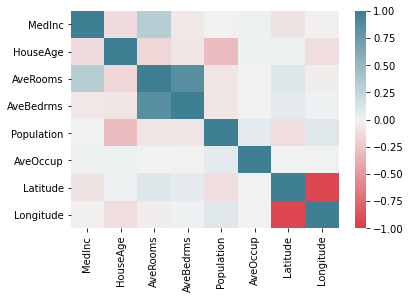

In [12]:
%matplotlib inline

import seaborn as sns

# We define a diverging colourmap so that 0.0 is white
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap=cmap)

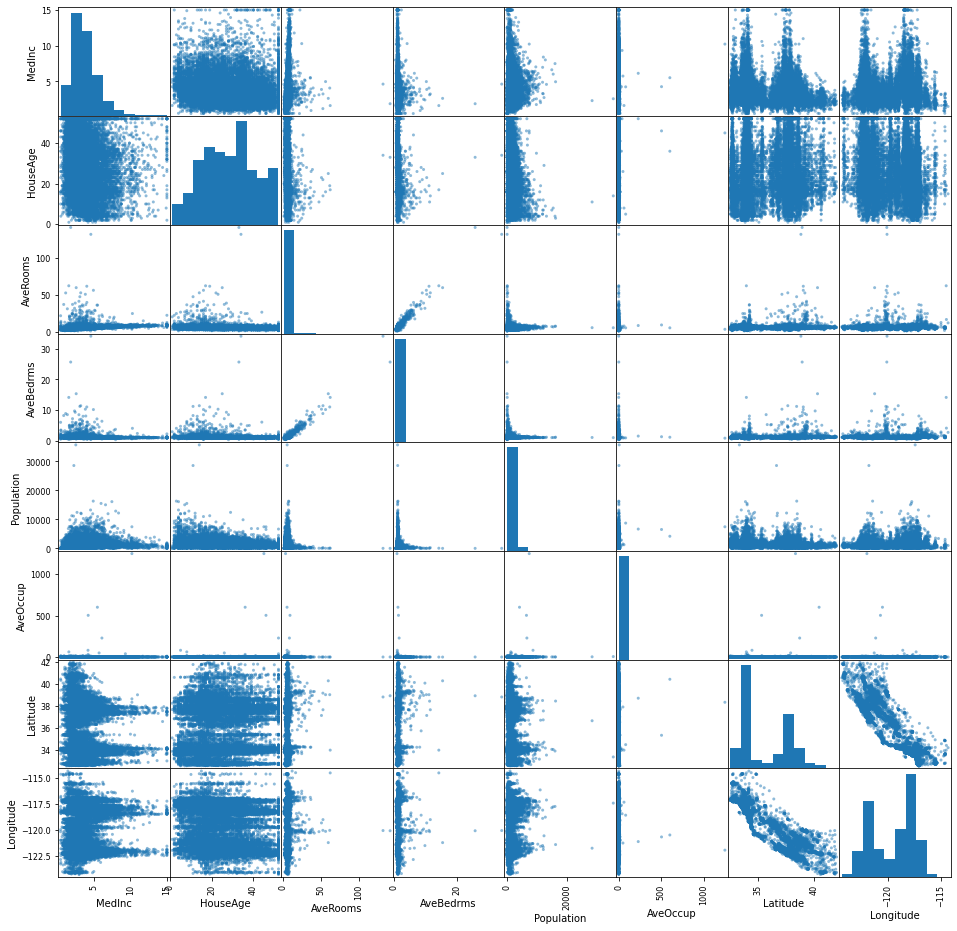

In [13]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(housing, figsize=(16, 16))

## Project

In [14]:
from pandas import DataFrame
from sklearn.datasets import load_iris

iris_data = load_iris()
iris = DataFrame(iris_data.data, columns=iris_data.feature_names)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [15]:
corr = iris.corr()

<AxesSubplot:>

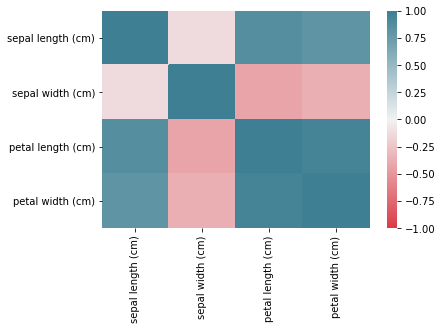

In [16]:
%matplotlib inline

import seaborn as sns

cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, vmin=-1.0, vmax=1.0, cmap=cmap)

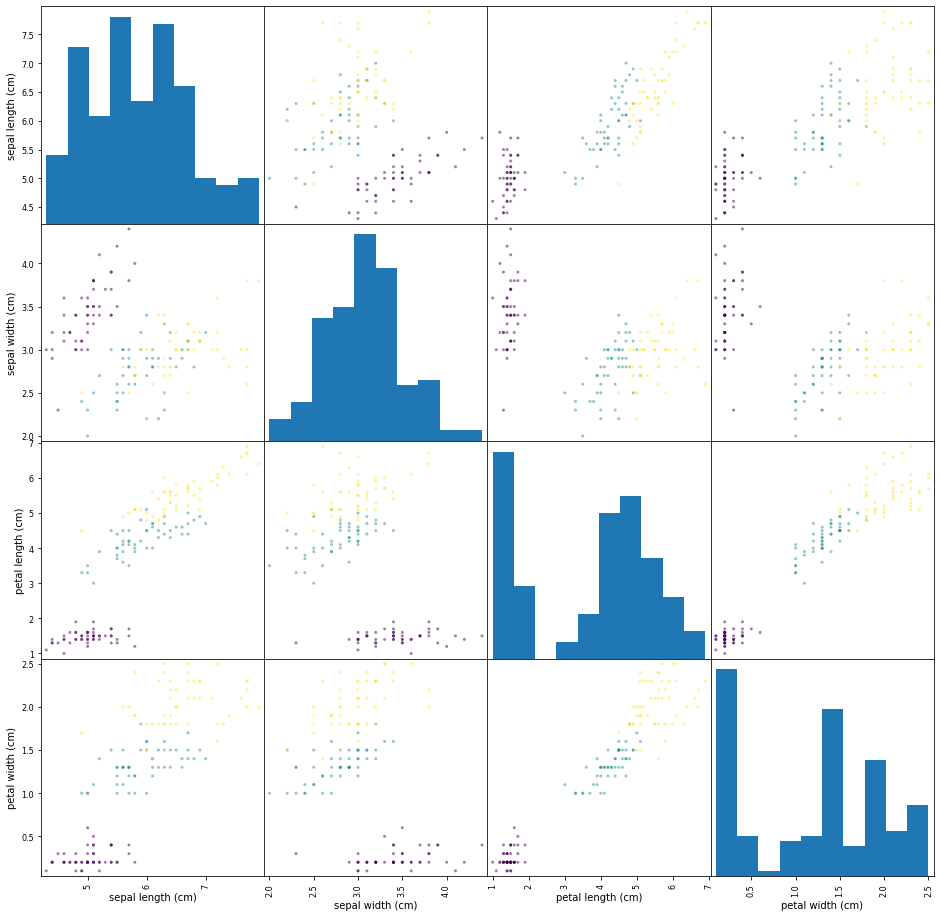

In [17]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(iris, figsize=(16, 16), c=iris_data.target)